# Data Imputation in the dirty database

#### Importing the main libraries

#### Reading the CSV

In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# extraindo data set e printando os 5 primeiros e 5 ultimos dados junto com as dimensoes
matches_info_df = pd.read_csv("https://raw.githubusercontent.com/gabrielaragao01/Data-Science-Project/main/code/pre_processing_data/normalizaded_matches.csv", index_col=0)
matches_info_df
df = matches_info_df.copy()

#### Viewing columns with null values and counting them

In [214]:
# Identificação das colunas com valores nulos e contagem dos valores nulos
null_counts = matches_info_df.isnull().sum()

# Filtragem das colunas que possuem valores nulos
null_counts = null_counts[null_counts > 0]

# Print das colunas com valores nulos e suas respectivas contagens
print(null_counts)

home_team_shots_on_target_dirty    114
home_shots_2_score                  86
dtype: int64


In [215]:
matches_info_df.home_team_shots_on_target_dirty.describe()
# dados antes das operaçoes com dados ausentes

count    266.000000
mean      -0.233584
std        0.357595
min       -1.000000
25%       -0.466667
50%       -0.200000
75%       -0.066667
max        1.000000
Name: home_team_shots_on_target_dirty, dtype: float64

Vamos ver quais são as colunas que estão mais correlacionadas para usar no nosso KNN

In [216]:
# Calcular a correlação de Spearman de todas as colunas com 'home_team_shots_on_target_dirty'
correlation_matrix = matches_info_df.corr(method='spearman')
home_shots_corr = correlation_matrix['home_team_shots_on_target_dirty']

# Filtrar correlações acima de 0.3 ou abaixo de -0.3
filtered_corr = home_shots_corr[home_shots_corr.abs() > 0.3]
filtered_corr

result                                    0.468277
performance_rank_home                     0.378742
B365H                                    -0.489231
B365A                                     0.479605
away_performance_rank                    -0.326165
home_team_goal_count                      0.546183
home_team_shots                           0.693819
home_team_shots_on_target_original        1.000000
home_team_corner_count                    0.351469
home_team_shots_on_target_dirty           1.000000
home_season_shots                         0.317069
home_season_shots_on_target               0.416778
B365H_log                                -0.489231
B365A_log                                 0.479605
home_team_goal_count_secondhalf_time_0   -0.411016
B365H_classification_0                    0.454505
B365A_classification_0                   -0.326570
Name: home_team_shots_on_target_dirty, dtype: float64

#### Dropping columns that doesnt make sense to home_team_shots_on_target and won't be useful for analyzing shot imputation

In [217]:
matches_info_df = matches_info_df.drop(['home_season_shots','home_team_shots_on_target_original','away_team_goal_count','B365D', 'B365A', 'away_team_shots', 'away_team_shots_on_target', 'away_team_corner_count', 'home_team_yellow_cards', 'home_team_red_cards', 'away_team_yellow_cards', 'away_team_red_cards', 'home_team_fouls', 'away_team_fouls', 'B365H_log', 'B365D_log', 'home_shots_2_score', 'home_team_name_AFC Bournemouth', 'home_team_name_Arsenal', 'home_team_name_Brighton & Hove Albion', 'home_team_name_Burnley', 'home_team_name_Cardiff City', 'home_team_name_Chelsea', 'home_team_name_Crystal Palace', 'home_team_name_Everton', 'home_team_name_Fulham', 'home_team_name_Huddersfield Town', 'home_team_name_Leicester City', 'home_team_name_Liverpool', 'home_team_name_Manchester City', 'home_team_name_Manchester United', 'home_team_name_Newcastle United', 'home_team_name_Southampton', 'home_team_name_Tottenham Hotspur', 'home_team_name_Watford', 'home_team_name_West Ham United', 'home_team_name_Wolverhampton Wanderers', 'away_team_name_AFC Bournemouth', 'away_team_name_Arsenal', 'away_team_name_Brighton & Hove Albion', 'away_team_name_Burnley', 'away_team_name_Cardiff City', 'away_team_name_Chelsea', 'away_team_name_Crystal Palace', 'away_team_name_Everton', 'away_team_name_Fulham', 'away_team_name_Huddersfield Town', 'away_team_name_Leicester City', 'away_team_name_Liverpool', 'away_team_name_Manchester City', 'away_team_name_Manchester United', 'away_team_name_Newcastle United', 'away_team_name_Southampton', 'away_team_name_Tottenham Hotspur', 'away_team_name_Watford', 'away_team_name_West Ham United', 'away_team_name_Wolverhampton Wanderers', 'home_team_goal_count_half_time_0', 'home_team_goal_count_half_time_1', 'home_team_goal_count_half_time_2', 'home_team_goal_count_half_time_3', 'home_team_goal_count_half_time_4', 'home_team_goal_count_secondhalf_time_1', 'home_team_goal_count_secondhalf_time_2', 'home_team_goal_count_secondhalf_time_3', 'home_team_goal_count_secondhalf_time_4', 'away_team_goal_count_half_time_0', 'away_team_goal_count_half_time_1', 'away_team_goal_count_half_time_2', 'away_team_goal_count_half_time_3', 'away_team_goal_count_secondhalf_time_0', 'away_team_goal_count_secondhalf_time_1', 'away_team_goal_count_secondhalf_time_2', 'away_team_goal_count_secondhalf_time_3', 'away_team_goal_count_secondhalf_time_4', 'season_part_first', 'season_part_last', 'season_part_mid', 'day_or_night_Day', 'day_or_night_Night', 'home-80-final_False', 'home-80-final_True', 'away-80-final_False', 'away-80-final_True', '80-final_False', '80-final_True', 'referee_Andre Marriner', 'referee_Andy Madley', 'referee_Anthony Taylor', 'referee_Chris Kavanagh', 'referee_Craig Pawson', 'referee_David Coote', 'referee_Graham Scott', 'referee_Jonathan Moss', 'referee_Kevin Friend', 'referee_Lee Mason', 'referee_Lee Probert', 'referee_Martin Atkinson', 'referee_Michael Oliver', 'referee_Mike Dean', 'referee_Paul Tierney', 'referee_Roger East', 'referee_Simon Hooper', 'referee_Stuart Attwell', 'dirty_0', 'dirty_1'
, 'B365H_classification_0', 'B365H_classification_1', 'B365H_classification_2', 'B365H_classification_3', 'B365H_classification_4', 'B365D_classification_0', 'B365D_classification_1', 'B365D_classification_2', 'B365D_classification_3', 'B365D_classification_4', 'B365A_classification_0', 'B365A_classification_1', 'B365A_classification_2', 'B365A_classification_3', 'B365A_classification_4'
], axis=1)
matches_info_df

,result,performance_rank_home,B365H,away_performance_rank,Pre-Match PPG (Home),Pre-Match PPG (Away),home_team_goal_count,home_team_shots,home_team_corner_count,home_team_shots_on_target_dirty,home_season_shots_on_target,B365A_log,home_team_goal_count_secondhalf_time_0
0,0.090909,0.473684,-0.953510,0.157895,-1.000000,-1.000000,-0.333333,-0.384615,-0.764706,-0.066667,0.541667,0.056359,0.0
1,-0.272727,-0.263158,-0.741112,0.684211,-1.000000,-1.000000,-0.666667,-0.153846,-0.647059,-0.600000,-0.437500,-0.666900,1.0
2,0.272727,-0.368421,-0.923428,-0.789474,-1.000000,-1.000000,-0.333333,-0.153846,-0.176471,-0.333333,-0.395833,-0.227414,0.0
3,-0.454545,-0.894737,-0.868733,-0.157895,-1.000000,-1.000000,-1.000000,-0.153846,-0.411765,NaN,-0.375000,-0.452657,1.0
4,-0.636364,-1.000000,-0.504102,0.789474,-1.000000,-1.000000,-1.000000,-0.538462,-0.764706,-0.733333,-0.875000,-0.798399,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,0.272727,0.894737,-0.978122,0.368421,0.853333,-0.146667,-0.333333,-0.153846,-0.529412,-0.200000,0.541667,0.269118,0.0
376,-0.454545,0.473684,-0.979945,-0.789474,0.333333,-0.593333,-1.000000,0.615385,0.294118,0.466667,0.541667,0.269118,1.0
377,-0.090909,-0.578947,-0.965360,-1.000000,-0.186667,-0.780000,-0.666667,-0.461538,-0.529412,-0.466667,-0.229167,0.125889,1.0
378,-0.090909,0.684211,-0.896080,0.263158,0.373333,-0.293333,-0.333333,-0.307692,-0.176471,-0.466667,0.104167,-0.367024,0.0


Tínhamos realizado a imputação dos dados faltantes de diversas maneiras, incluindo a substituição pela média, mediana e valores aleatórios dentro do intervalo mínimo e máximo, bem como a exclusão das linhas com valores ausentes. Contudo, todas essas abordagens estavam impactando consideravelmente nas estatísticas e correlações dos dados. Após uma análise mais detalhada, percebemos que algumas dessas imputações não faziam sentido.

Portanto, optamos por utilizar o algoritmo KNN (K-Nearest Neighbors). Além disso, removemos algumas colunas que não estavam diretamente relacionadas com a variável de interesse, como por exemplo, os dados relacionados aos chutes do time visitante para análise do desempenho de chutes no alvo do time da casa.

##### O método KNN é um algoritmo de aprendizado supervisionado utilizado para tarefas de classificação e regressão. Ele funciona identificando os "vizinhos mais próximos" de um ponto de dados não rotulado com base em uma medida de distância (geralmente distância euclidiana) e atribuindo a ele o rótulo ou valor alvo desses vizinhos mais próximos. No caso da imputação de dados, o KNN procura os pontos de dados mais próximos ao ponto com valor ausente e utiliza os valores desses vizinhos para preencher o valor ausente.

o KNN pode ser eficaz em estimar esses valores ausentes com base nas informações das partidas vizinhas. Isso é preferível em relação a métodos como excluir a coluna ou estimar pela média, que não levariam em consideração o contexto específico dos dados e poderiam comprometer a qualidade da análise subsequente.

In [218]:
from fancyimpute import KNN
# Imputação usando KNN
imputer = KNN(k=7)
matches_knn_df = matches_info_df.copy()

# multiplicando por -1 porque sao inversamente proporcionais
matches_knn_df['away_performance_rank'] = matches_knn_df['away_performance_rank'] * -1
matches_knn_df['Pre-Match PPG (Away)'] = matches_knn_df['Pre-Match PPG (Away)'] * -1
matches_knn_df['B365H'] = matches_knn_df['B365H'] * -1
matches_knn_df['home_team_goal_count_secondhalf_time_0'] = matches_knn_df['home_team_goal_count_secondhalf_time_0'] * -1


imputed_data = imputer.fit_transform(matches_knn_df)

# Criar um DataFrame a partir dos dados imputados
matches_knn_df = pd.DataFrame(imputed_data, columns=matches_knn_df.columns)

# Correção de inconsistências, caso haja algum time com mais chutes a gol do que chutes no geral
matches_knn_df['home_team_shots_on_target_dirty'] = matches_knn_df.apply(
    lambda row: min(row['home_team_shots'], row['home_team_shots_on_target_dirty']) 
    if row['home_team_shots_on_target_dirty'] > row['home_team_shots'] else row['home_team_shots_on_target_dirty'],
    axis=1
)


Imputing row 1/380 with 0 missing, elapsed time: 0.035
Imputing row 101/380 with 1 missing, elapsed time: 0.035
Imputing row 201/380 with 1 missing, elapsed time: 0.035
Imputing row 301/380 with 0 missing, elapsed time: 0.040


Verificando como era a correlação dos dados da coluna suja antes da inputação, após a imputação e a correlação com os dados reais

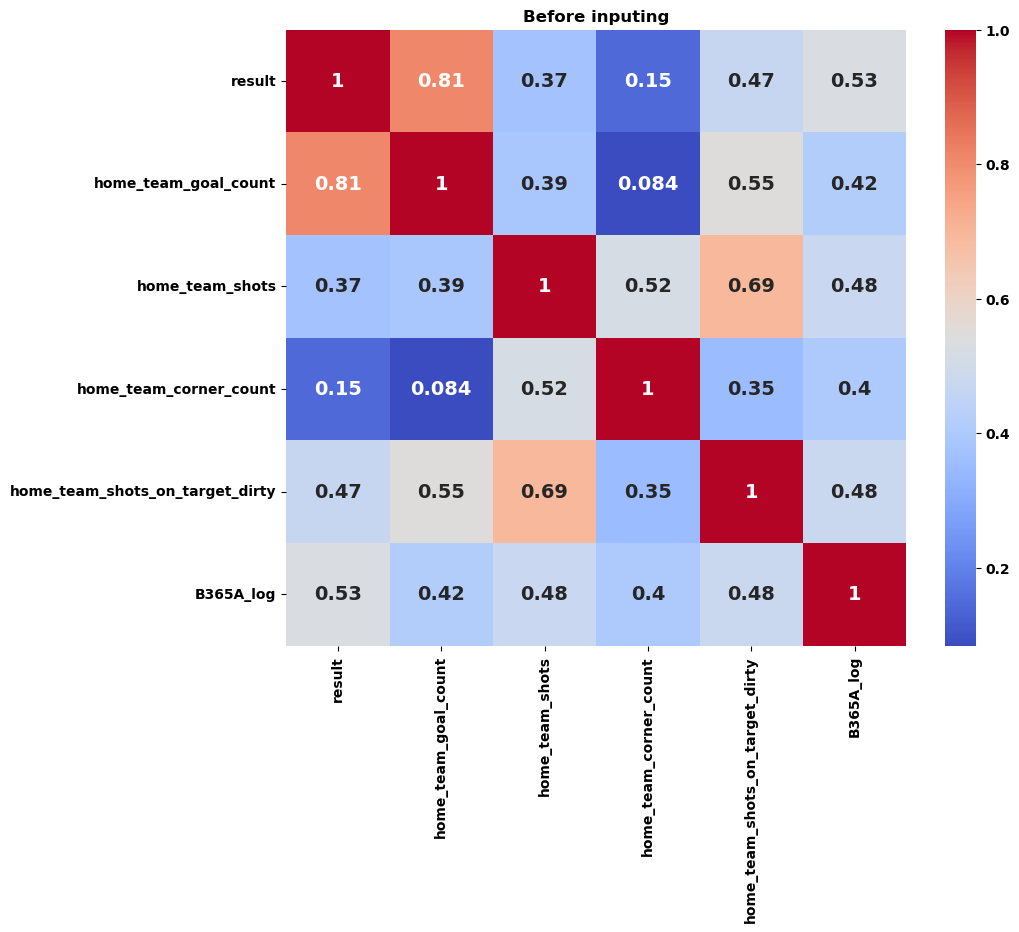

In [219]:
# Select only the numeric columns
numeric_columns = matches_info_df.select_dtypes(include=['float64', 'int64'])

# Further filter numeric columns to include specific columns of interest
numeric_columns = numeric_columns.drop(columns=['performance_rank_home','away_performance_rank','Pre-Match PPG (Home)', 'Pre-Match PPG (Away)'])

numeric_columns = numeric_columns[['result', 'home_team_goal_count', 'home_team_shots', 
                           'home_team_corner_count', 'home_team_shots_on_target_dirty', 'B365A_log']]

# Calculate the covariance matrix for the selected numeric columns
corr_matrix = numeric_columns.corr('spearman')

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
plt.title('Before inputing')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={'size': 14})
plt.show()


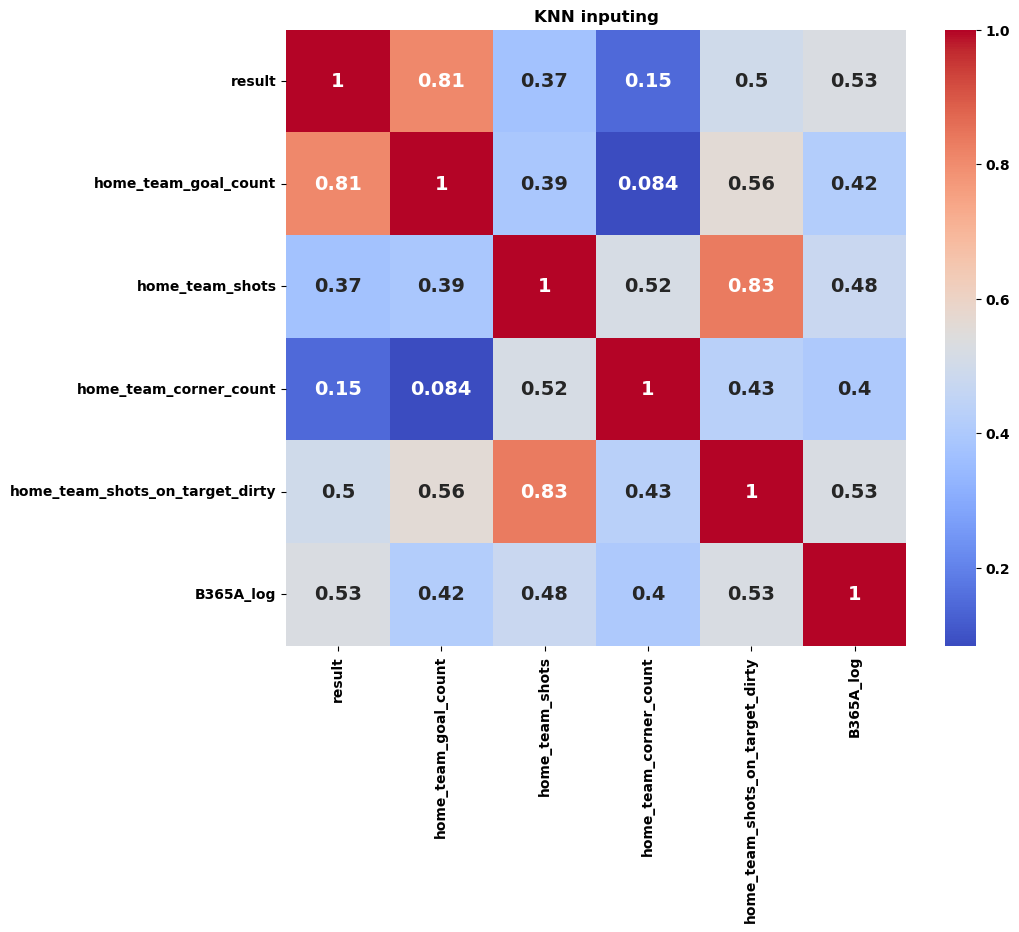

In [220]:
# Select only the numeric columns
numeric_columns = matches_knn_df.select_dtypes(include=['float64', 'int64'])

# Further filter numeric columns to include specific columns of interest
numeric_columns = matches_knn_df.drop(columns=['performance_rank_home','away_performance_rank','Pre-Match PPG (Home)', 'Pre-Match PPG (Away)'])

numeric_columns = numeric_columns[['result', 'home_team_goal_count', 'home_team_shots', 
                           'home_team_corner_count', 'home_team_shots_on_target_dirty', 'B365A_log']]

# Calculate the covariance matrix for the selected numeric columns
corr_matrix = numeric_columns.corr('spearman')

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
plt.title('KNN inputing')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={'size': 14})
plt.show()



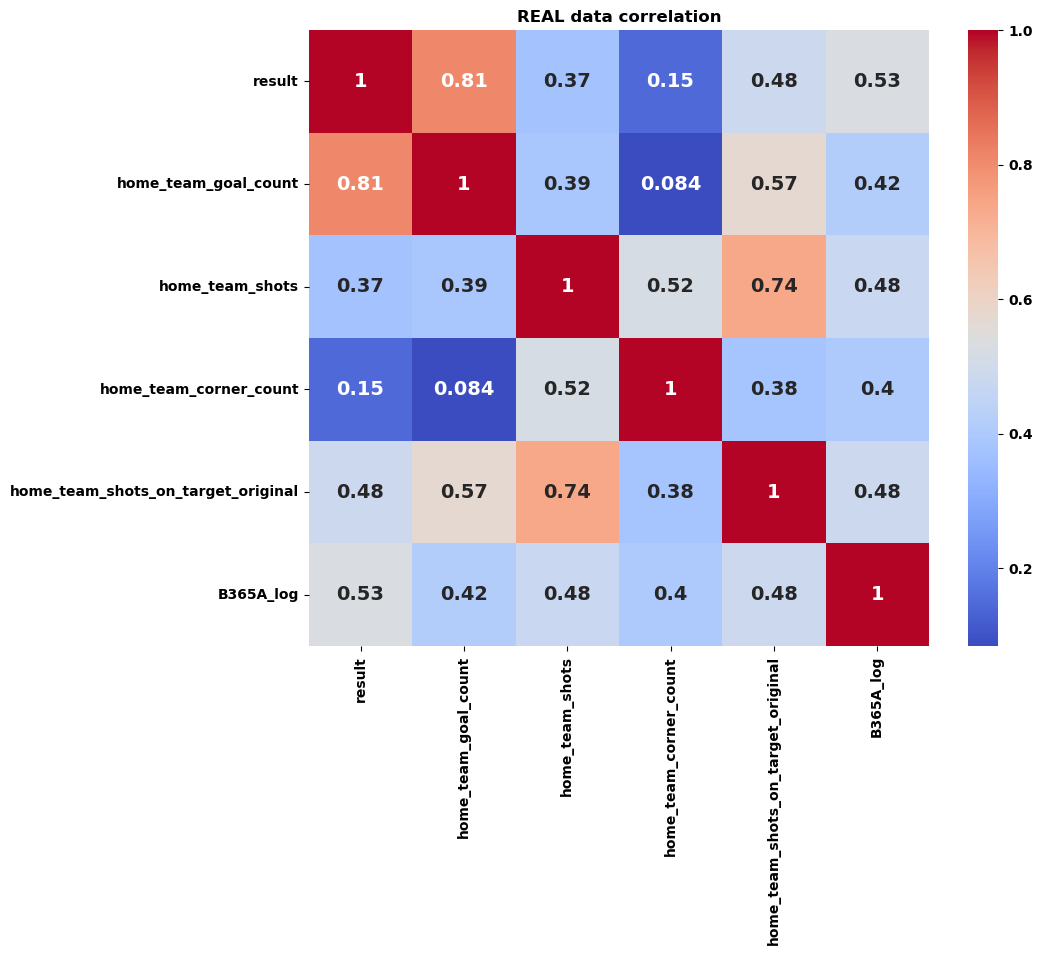

In [221]:
main_df = pd.read_csv("https://raw.githubusercontent.com/gabrielaragao01/Data-Science-Project/main/code/pre_processing_data/normalizaded_matches.csv", index_col=0)

# Select only the numeric columns
numeric_columns = main_df.select_dtypes(include=['float64', 'int64'])

# Further filter numeric columns to include specific columns of interest
numeric_columns = main_df[['result', 'home_team_goal_count', 'home_team_shots', 
                           'home_team_corner_count', 'home_team_shots_on_target_original', 'B365A_log']]

# Calculate the covariance matrix for the selected numeric columns
corr_matrix = numeric_columns.corr('spearman')

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
plt.title('REAL data correlation')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={'size': 14})
plt.show()



Comparando as colunas originais e as imputadas

In [222]:
# Obter os índices das linhas com NaN em matches_knn
nan_indices = matches_info_df.index[matches_info_df['home_team_shots_on_target_dirty'].isna()]

# Selecionar as linhas correspondentes em matches_info_df
nan_data_original_main = main_df.loc[nan_indices, ['home_team_shots_on_target_original']]

# Selecionar as linhas correspondentes em matches_info_df
nan_data_original_knn = matches_knn_df.loc[nan_indices, ['home_team_shots_on_target_dirty']]

# Concatenar os dataframes em duas colunas
comparison_df = pd.concat([nan_data_original_main, nan_data_original_knn], axis=1)
comparison_df

,home_team_shots_on_target_original,home_team_shots_on_target_dirty
3,-0.066667,-0.497674
7,0.200000,0.230769
15,0.600000,0.204739
16,-0.466667,-0.479408
18,-0.466667,-0.514940
...,...,...
360,-0.066667,-0.213072
365,0.066667,-0.253860
367,-0.466667,-0.538462
370,-0.600000,-0.694462


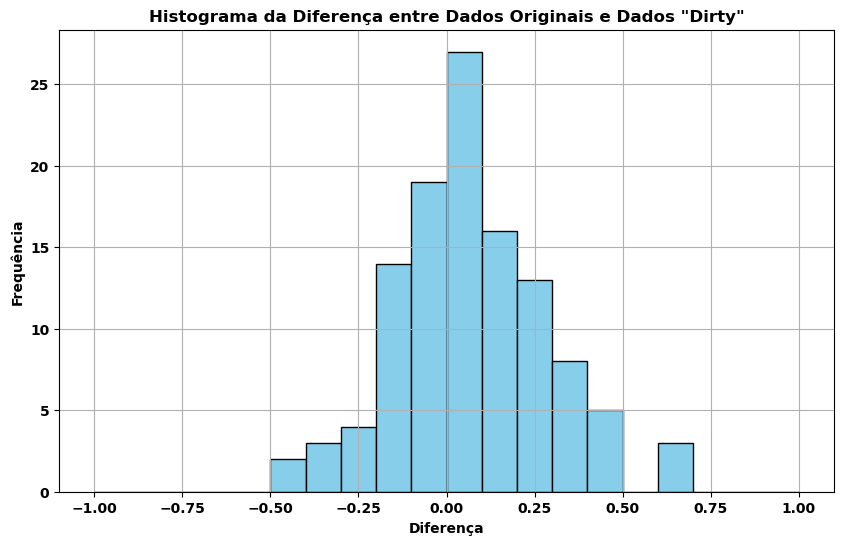

In [223]:
# Calcular a diferença entre os dados originais e os dados "dirty"
comparison_df['difference'] = comparison_df['home_team_shots_on_target_original'] - comparison_df['home_team_shots_on_target_dirty']

# Plotar o histograma da diferença
plt.figure(figsize=(10, 6))
plt.hist(comparison_df['difference'], bins=20, range=(-1, 1), color='skyblue', edgecolor='black')
plt.title('Histograma da Diferença entre Dados Originais e Dados "Dirty"')
plt.xlabel('Diferença')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()


É esperado que a correlação aumente entre as colunas utilzadas para fazer a imputação, uma vez que o algoritmo KNN foi utilizado para imputar dados faltantes a partir dessas colunas. Analogamente, espera-se que, à medida que um time realize mais finalizações, haja um aumento correspondente no número de chutes no gol, o que naturalmente resultaria em um aumento na correlação entre essas medidas.

Além disso, observamos que o KNN estimou os valores de forma moderada, aproximando-se da precisão em alguns casos, mas distanciando-se em outros.

In [224]:
# o sem inputar
print(matches_info_df.home_team_shots_on_target_dirty.describe())
print()

# o imputado
print(matches_knn_df.home_team_shots_on_target_dirty.describe())
print()

# o original
print(main_df.home_team_shots_on_target_original.describe())
# a media e a mediana se mantiveram um pouco mais estaveis
# a mediana nem tanto, ver isso depois

count    266.000000
mean      -0.233584
std        0.357595
min       -1.000000
25%       -0.466667
50%       -0.200000
75%       -0.066667
max        1.000000
Name: home_team_shots_on_target_dirty, dtype: float64

count    380.000000
mean      -0.293170
std        0.299825
min       -1.000000
25%       -0.478783
50%       -0.333333
75%       -0.076923
max        0.846154
Name: home_team_shots_on_target_dirty, dtype: float64

count    380.000000
mean      -0.231930
std        0.362098
min       -1.000000
25%       -0.466667
50%       -0.200000
75%       -0.066667
max        1.000000
Name: home_team_shots_on_target_original, dtype: float64
